## Parameter Configuration

In [1]:
import sys
import numpy as np
import pandas as pd

from fairsearchcore.models import FairScoreDoc
import fairsearchcore as fsc
from codes.alg import FPRank, FSPR_model, best_FPRank
from codes.metrics import evaluate

######################################################################
# Column names
######################################################################

data = 'ICLR2018'
prt_attr = 'famous'
class_attr = 'h_c'
score_attr = 's'

######################################################################
# Configuration parameters
######################################################################

numBins = 10
bin_width = 0.1
score_norm = 10

filename = 'data/' + data
output_file = './results/' + data

## Loading Data

Min acceptability score = 0.2667, Max acceptability score = 0.9000


<AxesSubplot: xlabel='Class'>

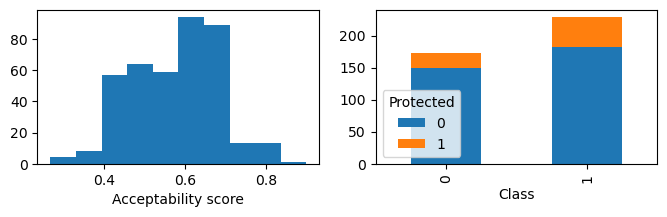

In [2]:
from codes.data_loader import load_data
import matplotlib.pyplot as plt

adj, data, W, s, y, prt = load_data(filename, class_attr, score_attr, prt_attr, score_norm = score_norm)
print('Min acceptability score = {:.4f}, Max acceptability score = {:.4f}'.format(np.min(s), np.max(s)))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,2))
ax1.hist(s)
ax1.set_xlabel('Acceptability score')

df = pd.DataFrame({'Class': y, 'Protected': prt}, dtype='int')
df.groupby(['Class', 'Protected']).size().unstack().plot(ax=ax2, kind='bar', stacked=True)

Total number of nodes = 402
Number of isolated nodes = 180


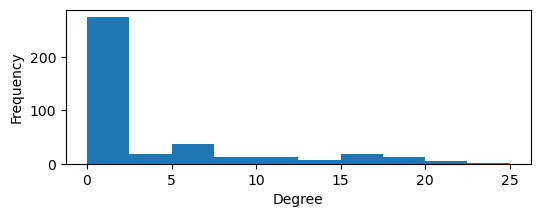

In [3]:
degrees = adj.sum(axis=1)
plt.figure(figsize=(6,2))
plt.hist(degrees)
plt.xlabel('Degree')
plt.ylabel('Frequency')

print('Total number of nodes =', degrees.shape[0])
print('Number of isolated nodes =', sum(degrees==0))

## Results for No Calibration

Results for No Calibration

  prec: 0.848019 |  Rank corr: 1.000000  | fp: 0.753731 | wsd: 0.066316 | wrd: 0.081451


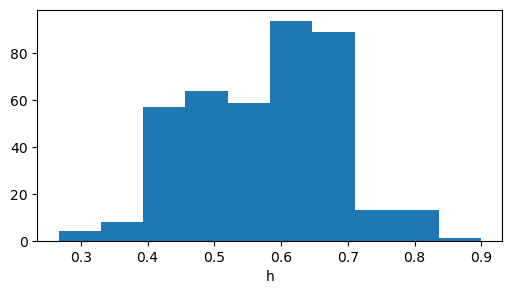

In [4]:
print('Results for No Calibration')
evaluate(s, y, s, prt, W, numBins = numBins, bin_width = bin_width)
out_df = pd.DataFrame({'h': s, prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_Nocal.csv', index = False)

## Results for FPRank

In [5]:
results, params  = FPRank(W, s, y, prt, numBins = numBins, bin_width=bin_width)
out_df = pd.DataFrame(results)
out_df.to_csv(output_file + '_FPresults.csv', index=False)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

  alpha=0.0100, beta=0.1000: prec=0.8435, corr=0.9935, fp=0.7488, wsd=0.064624, wrd=0.081513
  alpha=0.0100, beta=0.1624: prec=0.8449, corr=0.9936, fp=0.7488, wsd=0.064305, wrd=0.081475
  alpha=0.0100, beta=0.2637: prec=0.8450, corr=0.9935, fp=0.7388, wsd=0.063789, wrd=0.081476
  alpha=0.0100, beta=0.4281: prec=0.8458, corr=0.9934, fp=0.7363, wsd=0.062959, wrd=0.081447
  alpha=0.0100, beta=0.6952: prec=0.8449, corr=0.9921, fp=0.7239, wsd=0.061631, wrd=0.081472
  alpha=0.0100, beta=1.1288: prec=0.8422, corr=0.9863, fp=0.7065, wsd=0.059544, wrd=0.081536
  alpha=0.0100, beta=1.8330: prec=0.8416, corr=0.9665, fp=0.6816, wsd=0.055856, wrd=0.080972
  alpha=0.0100, beta=2.9764: prec=0.8274, corr=0.9184, fp=0.6617, wsd=0.048622, wrd=0.080385
  alpha=0.0100, beta=4.8329: prec=0.8078, corr=0.8176, fp=0.6095, wsd=0.038607, wrd=0.066923
  alpha=0.0100, beta=7.8476: prec=0.7951, corr=0.7644, fp=0.5821, wsd=0.035425, wrd=0.061062
  alpha=0.0100, beta=12.7427: prec=0.7905, corr=0.7444, fp=0.5697, wsd

 10%|████████▎                                                                          | 1/10 [00:02<00:23,  2.64s/it]

  alpha=0.0100, beta=1000.0000: prec=0.7721, corr=0.6959, fp=0.6866, wsd=0.034632, wrd=0.058906
  alpha=0.0278, beta=0.1000: prec=0.8437, corr=0.9935, fp=0.7488, wsd=0.062637, wrd=0.081514
  alpha=0.0278, beta=0.1624: prec=0.8448, corr=0.9935, fp=0.7488, wsd=0.062339, wrd=0.081475
  alpha=0.0278, beta=0.2637: prec=0.8445, corr=0.9935, fp=0.7388, wsd=0.061857, wrd=0.081476
  alpha=0.0278, beta=0.4281: prec=0.8450, corr=0.9934, fp=0.7363, wsd=0.061081, wrd=0.081447
  alpha=0.0278, beta=0.6952: prec=0.8449, corr=0.9921, fp=0.7239, wsd=0.059839, wrd=0.081471
  alpha=0.0278, beta=1.1288: prec=0.8427, corr=0.9863, fp=0.7065, wsd=0.057883, wrd=0.081536
  alpha=0.0278, beta=1.8330: prec=0.8416, corr=0.9664, fp=0.6816, wsd=0.054535, wrd=0.080979
  alpha=0.0278, beta=2.9764: prec=0.8273, corr=0.9183, fp=0.6617, wsd=0.047758, wrd=0.080389
  alpha=0.0278, beta=4.8329: prec=0.8080, corr=0.8175, fp=0.6095, wsd=0.038268, wrd=0.065865
  alpha=0.0278, beta=7.8476: prec=0.7956, corr=0.7643, fp=0.5821, w

 20%|████████████████▌                                                                  | 2/10 [00:05<00:20,  2.51s/it]

  alpha=0.0278, beta=615.8482: prec=0.7699, corr=0.6936, fp=0.8284, wsd=0.034473, wrd=0.059170
  alpha=0.0278, beta=1000.0000: prec=0.7733, corr=0.6983, fp=0.7711, wsd=0.034473, wrd=0.059685
  alpha=0.0774, beta=0.1000: prec=0.8437, corr=0.9936, fp=0.7488, wsd=0.057565, wrd=0.081513
  alpha=0.0774, beta=0.1624: prec=0.8450, corr=0.9935, fp=0.7488, wsd=0.057319, wrd=0.081476
  alpha=0.0774, beta=0.2637: prec=0.8444, corr=0.9935, fp=0.7388, wsd=0.056921, wrd=0.081476
  alpha=0.0774, beta=0.4281: prec=0.8478, corr=0.9934, fp=0.7363, wsd=0.056279, wrd=0.080637
  alpha=0.0774, beta=0.6952: prec=0.8478, corr=0.9921, fp=0.7239, wsd=0.055247, wrd=0.080660
  alpha=0.0774, beta=1.1288: prec=0.8449, corr=0.9862, fp=0.7065, wsd=0.053612, wrd=0.080726
  alpha=0.0774, beta=1.8330: prec=0.8420, corr=0.9661, fp=0.6816, wsd=0.051106, wrd=0.079770
  alpha=0.0774, beta=2.9764: prec=0.8282, corr=0.9176, fp=0.6617, wsd=0.045492, wrd=0.078804
  alpha=0.0774, beta=4.8329: prec=0.8074, corr=0.8172, fp=0.6095,

 30%|████████████████████████▉                                                          | 3/10 [00:07<00:17,  2.55s/it]

  alpha=0.0774, beta=615.8482: prec=0.7701, corr=0.6924, fp=0.7015, wsd=0.034038, wrd=0.058590
  alpha=0.0774, beta=1000.0000: prec=0.7741, corr=0.6952, fp=0.7960, wsd=0.034038, wrd=0.059069
  alpha=0.2154, beta=0.1000: prec=0.8505, corr=0.9935, fp=0.7488, wsd=0.046302, wrd=0.075147
  alpha=0.2154, beta=0.1624: prec=0.8511, corr=0.9935, fp=0.7488, wsd=0.046159, wrd=0.075111
  alpha=0.2154, beta=0.2637: prec=0.8524, corr=0.9935, fp=0.7388, wsd=0.045926, wrd=0.074693
  alpha=0.2154, beta=0.4281: prec=0.8519, corr=0.9934, fp=0.7363, wsd=0.045548, wrd=0.074691
  alpha=0.2154, beta=0.6952: prec=0.8518, corr=0.9921, fp=0.7239, wsd=0.044935, wrd=0.074711
  alpha=0.2154, beta=1.1288: prec=0.8495, corr=0.9863, fp=0.7065, wsd=0.043948, wrd=0.074382
  alpha=0.2154, beta=1.8330: prec=0.8452, corr=0.9660, fp=0.6841, wsd=0.042396, wrd=0.074648
  alpha=0.2154, beta=2.9764: prec=0.8326, corr=0.9157, fp=0.6617, wsd=0.039937, wrd=0.065215
  alpha=0.2154, beta=4.8329: prec=0.8082, corr=0.8143, fp=0.6070,

 40%|█████████████████████████████████▏                                                 | 4/10 [00:10<00:15,  2.61s/it]

  alpha=0.2154, beta=615.8482: prec=0.7698, corr=0.6929, fp=0.7886, wsd=0.032870, wrd=0.054826
  alpha=0.2154, beta=1000.0000: prec=0.7762, corr=0.7147, fp=0.7886, wsd=0.032870, wrd=0.056643
  alpha=0.5995, beta=0.1000: prec=0.8583, corr=0.9894, fp=0.7562, wsd=0.027988, wrd=0.018761
  alpha=0.5995, beta=0.1624: prec=0.8593, corr=0.9895, fp=0.7562, wsd=0.027988, wrd=0.018728
  alpha=0.5995, beta=0.2637: prec=0.8604, corr=0.9894, fp=0.7463, wsd=0.027992, wrd=0.018698
  alpha=0.5995, beta=0.4281: prec=0.8602, corr=0.9894, fp=0.7438, wsd=0.028010, wrd=0.018895
  alpha=0.5995, beta=0.6952: prec=0.8596, corr=0.9885, fp=0.7239, wsd=0.028060, wrd=0.020707
  alpha=0.5995, beta=1.1288: prec=0.8569, corr=0.9830, fp=0.7065, wsd=0.028142, wrd=0.023508
  alpha=0.5995, beta=1.8330: prec=0.8522, corr=0.9632, fp=0.6816, wsd=0.028346, wrd=0.026202
  alpha=0.5995, beta=2.9764: prec=0.8362, corr=0.9131, fp=0.6617, wsd=0.028864, wrd=0.027512
  alpha=0.5995, beta=4.8329: prec=0.8101, corr=0.8138, fp=0.6020,

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:12<00:12,  2.49s/it]

  alpha=0.5995, beta=615.8482: prec=0.7719, corr=0.6978, fp=0.7886, wsd=0.029927, wrd=0.052585
  alpha=0.5995, beta=1000.0000: prec=0.7731, corr=0.6936, fp=0.7463, wsd=0.029927, wrd=0.052130
  alpha=1.6681, beta=0.1000: prec=0.8599, corr=0.9790, fp=0.7562, wsd=0.010807, wrd=0.000147
  alpha=1.6681, beta=0.1624: prec=0.8601, corr=0.9790, fp=0.7562, wsd=0.010933, wrd=0.000109
  alpha=1.6681, beta=0.2637: prec=0.8605, corr=0.9793, fp=0.7463, wsd=0.011144, wrd=0.000099
  alpha=1.6681, beta=0.4281: prec=0.8601, corr=0.9791, fp=0.7438, wsd=0.011505, wrd=0.000098
  alpha=1.6681, beta=0.6952: prec=0.8601, corr=0.9782, fp=0.7313, wsd=0.012138, wrd=0.000105
  alpha=1.6681, beta=1.1288: prec=0.8577, corr=0.9740, fp=0.7139, wsd=0.013282, wrd=0.000495
  alpha=1.6681, beta=1.8330: prec=0.8527, corr=0.9559, fp=0.6915, wsd=0.015371, wrd=0.000878
  alpha=1.6681, beta=2.9764: prec=0.8362, corr=0.9081, fp=0.6642, wsd=0.018805, wrd=0.002660
  alpha=1.6681, beta=4.8329: prec=0.8103, corr=0.8059, fp=0.6095,

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:14<00:09,  2.42s/it]

  alpha=1.6681, beta=615.8482: prec=0.7696, corr=0.6766, fp=0.7488, wsd=0.023571, wrd=0.006445
  alpha=1.6681, beta=1000.0000: prec=0.7742, corr=0.6892, fp=0.7786, wsd=0.023571, wrd=0.006902
  alpha=4.6416, beta=0.1000: prec=0.8597, corr=0.9785, fp=0.7562, wsd=0.002561, wrd=0.000132
  alpha=4.6416, beta=0.1624: prec=0.8606, corr=0.9785, fp=0.7562, wsd=0.002613, wrd=0.000087
  alpha=4.6416, beta=0.2637: prec=0.8614, corr=0.9785, fp=0.7512, wsd=0.002703, wrd=0.000049
  alpha=4.6416, beta=0.4281: prec=0.8608, corr=0.9784, fp=0.7438, wsd=0.002859, wrd=0.000046
  alpha=4.6416, beta=0.6952: prec=0.8601, corr=0.9776, fp=0.7313, wsd=0.003141, wrd=0.000049
  alpha=4.6416, beta=1.1288: prec=0.8571, corr=0.9726, fp=0.7139, wsd=0.003683, wrd=0.000087
  alpha=4.6416, beta=1.8330: prec=0.8530, corr=0.9558, fp=0.6965, wsd=0.004785, wrd=0.000288
  alpha=4.6416, beta=2.9764: prec=0.8380, corr=0.9104, fp=0.6766, wsd=0.007114, wrd=0.000837
  alpha=4.6416, beta=4.8329: prec=0.8117, corr=0.8146, fp=0.6269,

 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:17<00:07,  2.36s/it]

  alpha=4.6416, beta=615.8482: prec=0.7662, corr=0.6674, fp=0.7488, wsd=0.013772, wrd=0.003351
  alpha=4.6416, beta=1000.0000: prec=0.7686, corr=0.6666, fp=0.6866, wsd=0.013772, wrd=0.003059
  alpha=12.9155, beta=0.1000: prec=0.8598, corr=0.9785, fp=0.7562, wsd=0.000434, wrd=0.000145
  alpha=12.9155, beta=0.1624: prec=0.8607, corr=0.9785, fp=0.7562, wsd=0.000445, wrd=0.000087
  alpha=12.9155, beta=0.2637: prec=0.8612, corr=0.9785, fp=0.7512, wsd=0.000464, wrd=0.000042
  alpha=12.9155, beta=0.4281: prec=0.8620, corr=0.9785, fp=0.7463, wsd=0.000497, wrd=0.000039
  alpha=12.9155, beta=0.6952: prec=0.8602, corr=0.9778, fp=0.7313, wsd=0.000557, wrd=0.000034
  alpha=12.9155, beta=1.1288: prec=0.8573, corr=0.9736, fp=0.7164, wsd=0.000677, wrd=0.000067
  alpha=12.9155, beta=1.8330: prec=0.8535, corr=0.9589, fp=0.7015, wsd=0.000931, wrd=0.000179
  alpha=12.9155, beta=2.9764: prec=0.8421, corr=0.9202, fp=0.6816, wsd=0.001507, wrd=0.000539
  alpha=12.9155, beta=4.8329: prec=0.8230, corr=0.8454, f

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:20<00:05,  2.61s/it]

  alpha=12.9155, beta=1000.0000: prec=0.7642, corr=0.6606, fp=0.7413, wsd=0.005197, wrd=0.002899
  alpha=35.9381, beta=0.1000: prec=0.8598, corr=0.9785, fp=0.7562, wsd=0.000062, wrd=0.000171
  alpha=35.9381, beta=0.1624: prec=0.8606, corr=0.9785, fp=0.7562, wsd=0.000064, wrd=0.000089
  alpha=35.9381, beta=0.2637: prec=0.8612, corr=0.9785, fp=0.7512, wsd=0.000067, wrd=0.000037
  alpha=35.9381, beta=0.4281: prec=0.8619, corr=0.9785, fp=0.7463, wsd=0.000072, wrd=0.000029
  alpha=35.9381, beta=0.6952: prec=0.8611, corr=0.9778, fp=0.7313, wsd=0.000082, wrd=0.000024
  alpha=35.9381, beta=1.1288: prec=0.8580, corr=0.9739, fp=0.7164, wsd=0.000102, wrd=0.000042
  alpha=35.9381, beta=1.8330: prec=0.8538, corr=0.9603, fp=0.7040, wsd=0.000145, wrd=0.000118
  alpha=35.9381, beta=2.9764: prec=0.8424, corr=0.9246, fp=0.6791, wsd=0.000245, wrd=0.000358
  alpha=35.9381, beta=4.8329: prec=0.8260, corr=0.8628, fp=0.6592, wsd=0.000486, wrd=0.000627
  alpha=35.9381, beta=7.8476: prec=0.8026, corr=0.7799, f

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:22<00:02,  2.59s/it]

  alpha=35.9381, beta=1000.0000: prec=0.7585, corr=0.6597, fp=0.7363, wsd=0.001348, wrd=0.002726
  alpha=100.0000, beta=0.1000: prec=0.8596, corr=0.9785, fp=0.7562, wsd=0.000008, wrd=0.000205
  alpha=100.0000, beta=0.1624: prec=0.8604, corr=0.9785, fp=0.7562, wsd=0.000009, wrd=0.000095
  alpha=100.0000, beta=0.2637: prec=0.8613, corr=0.9785, fp=0.7537, wsd=0.000009, wrd=0.000033
  alpha=100.0000, beta=0.4281: prec=0.8620, corr=0.9785, fp=0.7463, wsd=0.000010, wrd=0.000024
  alpha=100.0000, beta=0.6952: prec=0.8613, corr=0.9778, fp=0.7313, wsd=0.000011, wrd=0.000010
  alpha=100.0000, beta=1.1288: prec=0.8580, corr=0.9739, fp=0.7164, wsd=0.000014, wrd=0.000024
  alpha=100.0000, beta=1.8330: prec=0.8542, corr=0.9609, fp=0.7015, wsd=0.000021, wrd=0.000054
  alpha=100.0000, beta=2.9764: prec=0.8426, corr=0.9260, fp=0.6816, wsd=0.000037, wrd=0.000185
  alpha=100.0000, beta=4.8329: prec=0.8265, corr=0.8684, fp=0.6567, wsd=0.000075, wrd=0.000357
  alpha=100.0000, beta=7.8476: prec=0.8069, corr

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:25<00:00,  2.59s/it]

  alpha=100.0000, beta=1000.0000: prec=0.7701, corr=0.6425, fp=0.7612, wsd=0.000288, wrd=0.004095


Range of evaluation measures:
   Precision: 0.7584933962418992 0.8620071164325462
   Fairness perception: 0.5522388059701493 0.8407960199004975
   WSD: 0.0646243210134234 8.407123345461277e-06
   WRD: 0.08153638427596734 1.0340063084778752e-05

Best parameters: alpha = 1.6681, beta = 0.1624 (util = 0.9245)

Result for FPRank:

  prec: 0.860109 |  Rank corr: 0.979048  | fp: 0.756219 | wsd: 0.010933 | wrd: 0.000109


{'precision': 0.8601091606037323,
 'corr': 0.9790482735964692,
 'fairperception': 0.7562189054726368,
 'wsd': 0.010932933838052106,
 'wrd': 0.00010868815468076744}

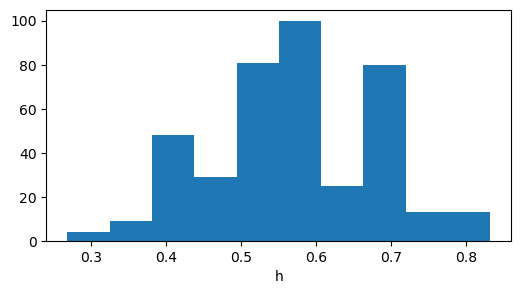

In [6]:
print('Range of evaluation measures:')
print('   Precision:', np.min(results['precision']), np.max(results['precision']))
print('   Fairness perception:', np.min(results['fairperception']), np.max(results['fairperception']))
print('   WSD:', np.max(results['wsd']), np.min(results['wsd']))
print('   WRD:', np.max(results['wrd']), np.min(results['wrd']))

h, bestparam, utils = best_FPRank(results, params)
out_df = pd.DataFrame({'h': h, prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_FPRank.csv', index = False)
print('\nResult for FPRank:')
evaluate(h, y, s, prt, W, numBins = numBins, bin_width = bin_width)

## Results for InFoRM

Require InFoRM package that can be downloaded from https://github.com/jiank2/inform

In [7]:
from InFoRM import utils
from InFoRM.method.debias_model import DebiasModel
from scipy.sparse import csc_matrix

def debias_mining_model(adj, s, alpha=0., metric='cosine'):
    # init params
    c = 0.85

    sp_adj = csc_matrix(adj)
    adj = utils.symmetric_normalize(sp_adj)
    
    # build similarity matrix
    sim = utils.filter_similarity_matrix(utils.get_similarity_matrix(adj, metric=metric), sigma=0.75)
    sim = utils.symmetric_normalize(sim)

    # debias pagerank
    FairModel = DebiasModel()
    
    personalization = s.reshape(-1,1)
    personalization = personalization/personalization.sum()
    
    r = FairModel.pagerank(adj, sim, alpha, c=c, personalization=personalization)
    r = np.array([list(r.values())])
    r = csc_matrix(np.array(r).transpose())

    return r


  prec: 0.699070 |  Rank corr: 0.359807  | fp: 0.691542 | wsd: 0.000001 | wrd: 0.095952


{'precision': 0.6990695117572399,
 'corr': 0.35980745477321957,
 'fairperception': 0.6915422885572139,
 'wsd': 1.0525816876581347e-06,
 'wrd': 0.09595161389857342}

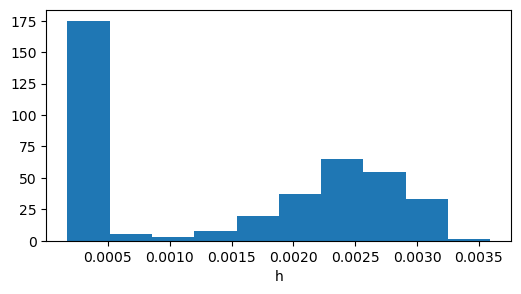

In [8]:
h = debias_mining_model(adj, s).toarray().flatten()
out_df = pd.DataFrame({'h': h, prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_INFORM.csv', index = False)
evaluate(h, y, s, prt, W, numBins = numBins, bin_width = bin_width)

## Results for FSPR

     pcost       dcost       gap    pres   dres
 0: -2.7008e+01 -5.1706e+02  2e+03  2e+00  7e-16
 1: -8.5774e+00 -1.8124e+02  2e+02  8e-02  5e-16
 2: -1.2283e+00 -7.9304e+00  8e+00  2e-03  1e-15
 3: -1.1325e+00 -2.0367e+00  1e+00  2e-04  5e-16
 4: -1.1814e+00 -1.9348e+00  8e-01  3e-05  3e-16
 5: -1.2586e+00 -1.6084e+00  3e-01  1e-16  4e-16
 6: -1.3263e+00 -1.4226e+00  1e-01  2e-16  3e-16
 7: -1.3422e+00 -1.3860e+00  4e-02  2e-16  2e-16
 8: -1.3587e+00 -1.3614e+00  3e-03  2e-16  3e-16
 9: -1.3599e+00 -1.3599e+00  5e-05  2e-16  3e-16
10: -1.3599e+00 -1.3599e+00  6e-07  2e-16  3e-16
Optimal solution found.

  prec: 0.774493 |  Rank corr: 0.495001  | fp: 0.703980 | wsd: 0.000654 | wrd: 0.084596


{'precision': 0.7744926526692558,
 'corr': 0.4950005471269392,
 'fairperception': 0.7039800995024875,
 'wsd': 0.0006542513821587596,
 'wrd': 0.0845955957370038}

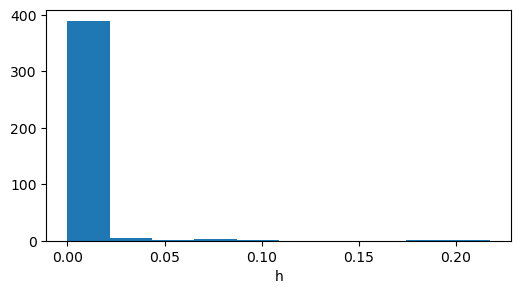

In [9]:
h = FSPR_model(adj, s, prt)
out_df = pd.DataFrame({'h': h.ravel(), prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_FSPR.csv', index = False)
evaluate(h.ravel(), y, s, prt, W, numBins = numBins, bin_width = bin_width)

## Results for FairTopk

Require fairsearchcore library from https://github.com/fair-search/fairsearch-fair-python

Result for FairTopK:

  prec: 0.821173 |  Rank corr: 0.940463  | fp: 0.758706 | wsd: 0.086480 | wrd: 0.085364


{'precision': 0.8211725568724969,
 'corr': 0.9404632098767406,
 'fairperception': 0.7587064676616916,
 'wsd': 0.08647968778317866,
 'wrd': 0.08536422995360952}

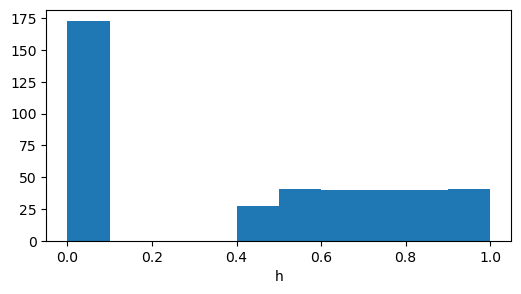

In [10]:
from codes.data_loader import load_data_fairtopk

rankings, k, p, data = load_data_fairtopk(filename, class_attr, score_attr, prt_attr, factor=1)

alpha = 0.1
fair = fsc.Fair(k, p, alpha)
re_ranked = fair.re_rank(rankings)
eps = 1/len(rankings)
h = np.zeros(len(rankings))
for i,item in enumerate(re_ranked):
    h[item.id] = 1 - i*eps
out_df = pd.DataFrame({'h': h, prt_attr : data[prt_attr]})
out_df.to_csv(output_file + '_FairTopk.csv', index = False)

print('Result for FairTopK:')
evaluate(h, y, s, prt, W, numBins = numBins, bin_width = bin_width)